# ================================================================
# 🧠 MACHINE LEARNING LAB EXPERIMENT
# ================================================================
# 🧪 Experiment Title: Implementation of K-Nearest Neighbors (KNN) Algorithm from Scratch
# 🎓 Course: Machine Learning / Data Science Lab
# 👨‍💻 Objective: To implement and evaluate the KNN algorithm without using scikit-learn.
# ================================================================

# ================================================================
# 🔹 SECTION 1: INTRODUCTION AND AIM
# ================================================================
"""
K-Nearest Neighbors (KNN) is a simple yet powerful supervised learning algorithm
used for classification and regression. It classifies a sample based on the majority
class among its 'k' nearest neighbors in the feature space.

🎯 Objectives:
- Implement the KNN algorithm using only NumPy.
- Load and preprocess datasets (Iris & Wine) from UCI ML Repository.
- Perform Exploratory Data Analysis (EDA) with visualization.
- Evaluate the effect of 'k' on accuracy.
- Test model generalization on another dataset (Wine).

This notebook is divided into 6 major tasks:
1️⃣ Data Handling
2️⃣ Utility Function (train_test_split)
3️⃣ KNN Classifier Implementation
4️⃣ Exploratory Data Analysis (EDA)
5️⃣ Model Integration and Evaluation
6️⃣ Generalization Test on Wine Dataset
"""

In [1]:
!pip install ucimlrepo

import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

def load_iris_data():
    """Loads and preprocesses the Iris dataset."""
    iris = fetch_ucirepo(id=53)
    X = iris.data.features
    y = iris.data.targets

    y = y.apply(lambda s: s.replace('Iris-', '') if isinstance(s, str) else s)

    return X.to_numpy(), y.to_numpy()

def load_wine_data():
    wine = fetch_ucirepo(id=109)
    X = wine.data.features
    y = wine.data.targets

    return X.to_numpy(), y.to_numpy()

# Quick check
X_iris, y_iris = load_iris_data()
print("Iris Dataset Loaded:")
print("Shape of X:", X_iris.shape)
print("Shape of y:", y_iris.shape)


Iris Dataset Loaded:
Shape of X: (150, 4)
Shape of y: (150, 1)


# ================================================================
# 🧩 TASK 2: UTILITY FUNCTION (utils.py)
# ================================================================
# Implement a custom train_test_split() function to divide data
# into training and testing sets without scikit-learn.
# ================================================================

In [2]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    test_size = int(n_samples * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Test the split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
print("Train set:", X_train.shape, "Test set:", X_test.shape)


Train set: (120, 4) Test set: (30, 4)


# ================================================================
# ⚙️ TASK 3: KNN CLASSIFIER IMPLEMENTATION (knn_classifier.py)
# ================================================================
# Build the KNN algorithm step-by-step:
# - Euclidean distance calculation
# - Model training (fit)
# - Prediction logic with majority voting
# ================================================================

In [4]:
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute all distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# ================================================================
# 📊 TASK 4: EXPLORATORY DATA ANALYSIS (eda.py)
# ================================================================
# Visualize pairwise feature relationships to understand separability
# among different Iris flower species.
# ================================================================


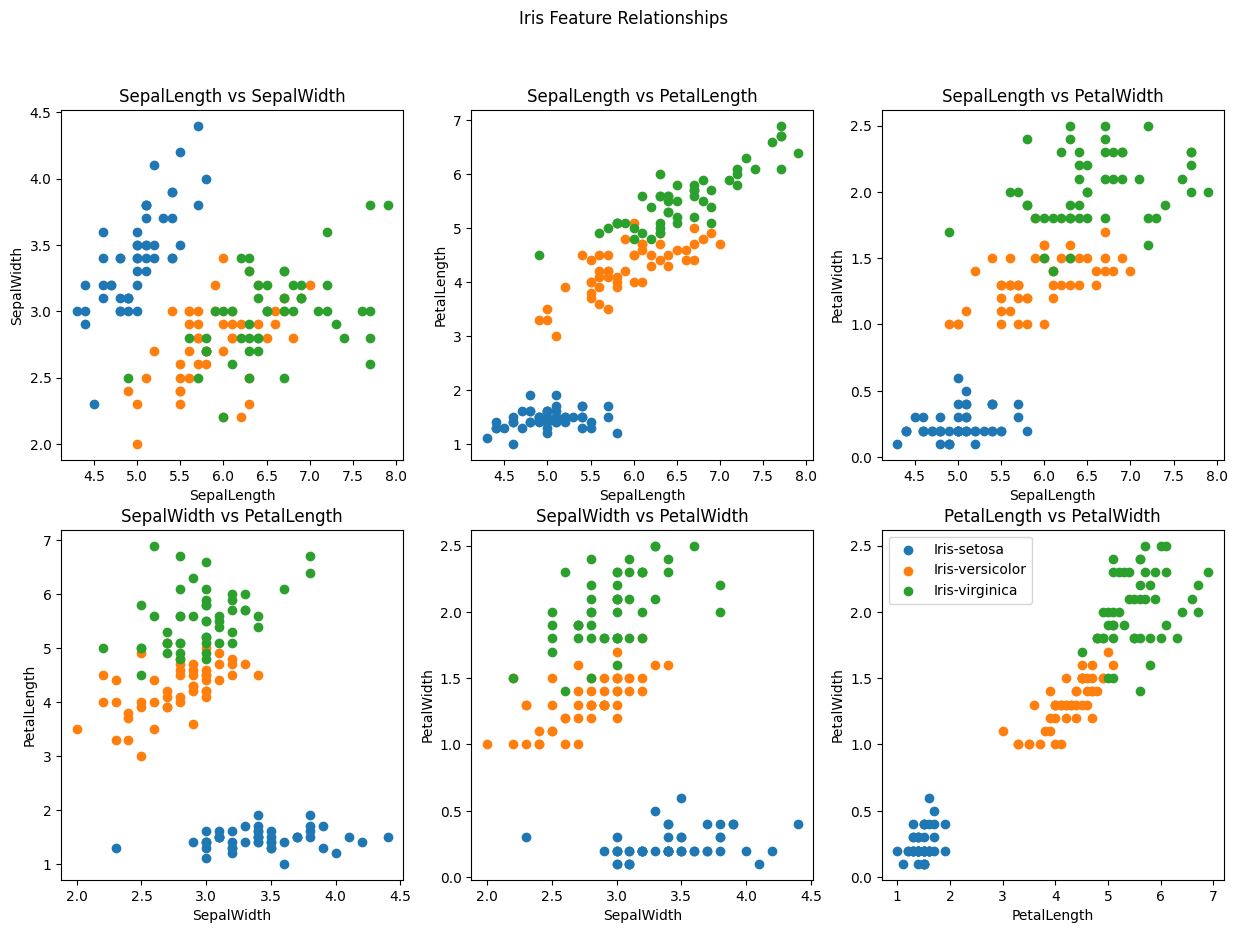

In [7]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_feature_pairs(X, y, feature_names=None, title="Feature Relationships"):
    y = np.ravel(y)

    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]

    n_features = X.shape[1]
    pairs = list(itertools.combinations(range(n_features), 2))

    plt.figure(figsize=(15, 10))
    for idx, (i, j) in enumerate(pairs[:6], 1):  # limit to first 6 pairs
        plt.subplot(2, 3, idx)
        for label in np.unique(y):
            plt.scatter(X[y == label, i], X[y == label, j], label=label)
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.title(f"{feature_names[i]} vs {feature_names[j]}")
    plt.suptitle(title)
    plt.legend()
    plt.show()
plot_feature_pairs(
    X_iris,
    y_iris,
    feature_names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"],
    title="Iris Feature Relationships"
)


# ================================================================
# 🧪 TASK 5: MODEL INTEGRATION & EVALUATION (main.py)
# ================================================================
# Integrate all components to form a working ML pipeline.
# Evaluate model performance for different 'k' values.
# Plot Accuracy vs K graph.
# ================================================================

In [10]:
from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = np.ravel(y_train)

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        k_nearest_labels = [label.item() if isinstance(label, np.ndarray) else label for label in k_nearest_labels]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# ================================================================
# 🍷 TASK 6: GENERALIZATION ON WINE DATASET
# ================================================================
# Test the same model on a new dataset (Wine) using best 'k' from Iris.
# ================================================================

In [12]:
try:
    best_k
except NameError:
    print("best_k not found — recalculating from Iris dataset...")
    accuracies = []
    k_values = [1, 3, 5, 7, 9, 11, 15]
    for k in k_values:
        model = KNNClassifier(k=k)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = np.sum(y_test == predictions) / len(y_test)
        accuracies.append(acc)
    best_k = k_values[np.argmax(accuracies)]
    print(f"✅ Computed best_k = {best_k}")

X_wine, y_wine = load_wine_data()
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

model_wine = KNNClassifier(k=best_k)
model_wine.fit(X_train_w, y_train_w)
preds_wine = model_wine.predict(X_test_w)

acc_wine = np.sum(y_test_w == preds_wine) / len(y_test_w)
print(f"🍷 Accuracy on Wine Dataset (k={best_k}): {acc_wine:.3f}")


best_k not found — recalculating from Iris dataset...
✅ Computed best_k = 7
🍷 Accuracy on Wine Dataset (k=7): 11.771
